FITS Image importing

In [ ]:
#Imports
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import numpy as np
import ipywidgets as widgets
from IPython.display import display

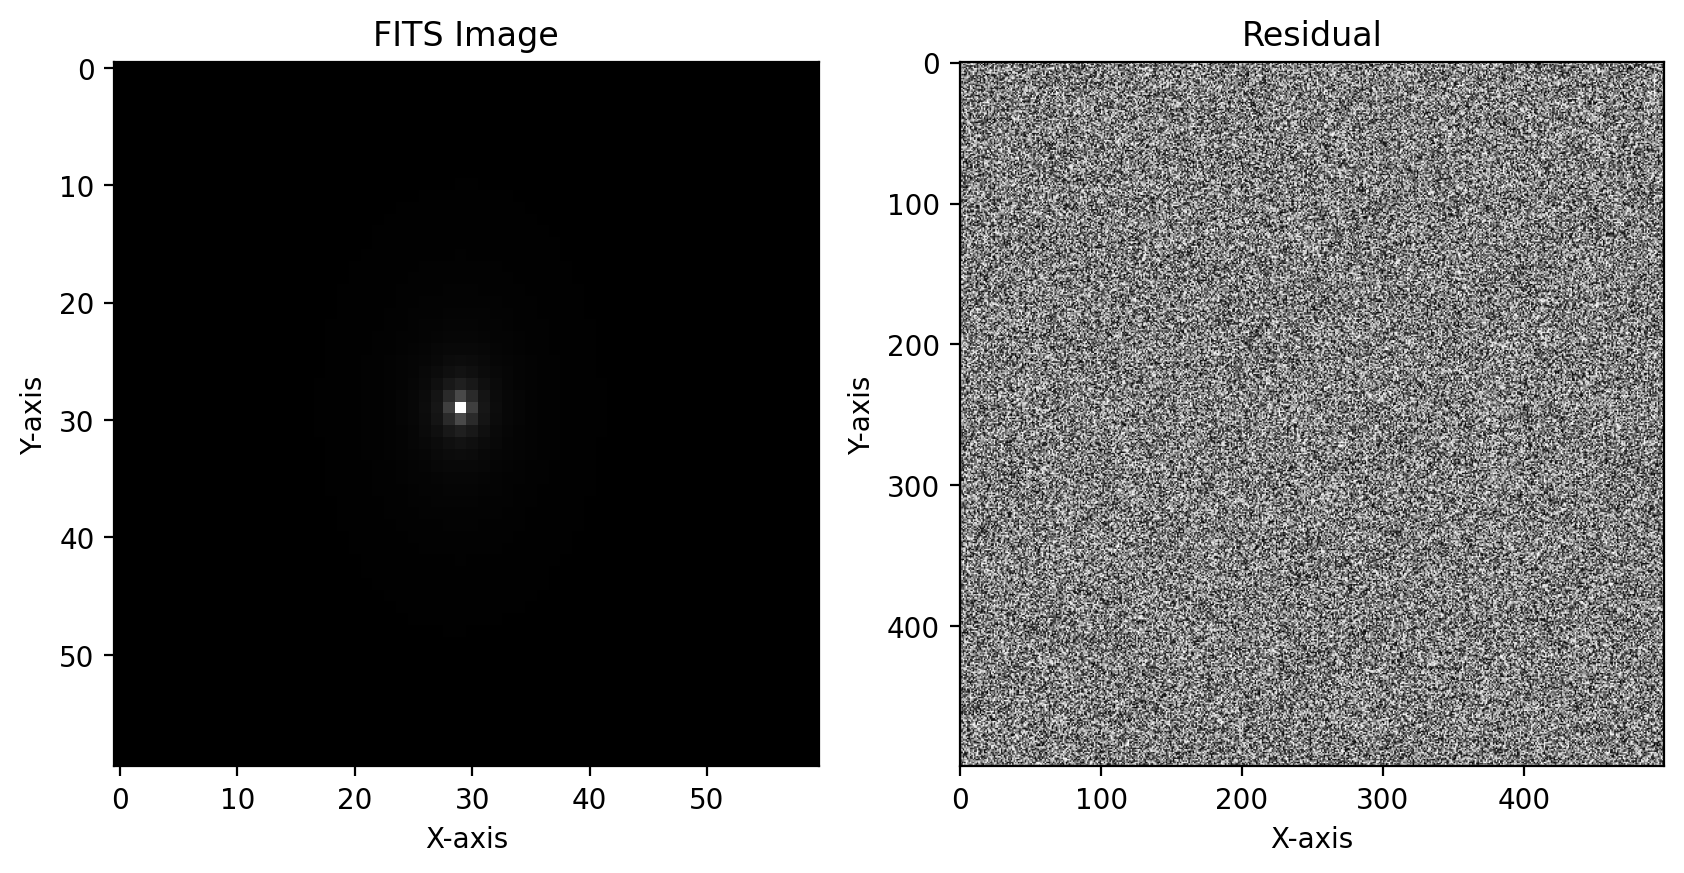

In [ ]:
# Update the filename to the correct path in your Colab environment

#WILL NEED TO MAKE AN ARRAY TO READ IN MULIPLE FILES
#filename = '../content/play_fits.fits'

# Open the FITS file
fits_file = fits.open(output_filename)

# Extract the image data from the FITS file
image_data_fits = fits_file[0].data

# Close the FITS file
fits_file.close()
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Display the FITS image
image_fits = ax1.imshow(image_data_fits, cmap='gray')

# Display the array image
image_array = ax2.imshow(image_data_array, cmap='gray')

# Function to update the FITS image when slider value changes
def update_image_fits(change):
    # Update the image data based on the slider value
    new_image_data_fits = image_data_fits * change.new

    # Update the FITS image with new data
    image_fits.set_data(new_image_data_fits)

    # Redraw the figure
    fig.canvas.draw()

# Function to update the array image when slider value changes
def update_image_array(change):
    # Update the image data based on the slider value
    new_image_data_array = image_data_array * change.new

    # Update the array image with new data
    image_array.set_data(new_image_data_array)

    # Redraw the figure
    fig.canvas.draw()

# Create a slider widget for the FITS image
slider_fits = widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='FITS Scale:', continuous_update=True)

# Create a slider widget for the array image
slider_array = widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Array Scale:', continuous_update=True)

# Attach the update_image_fits function to the FITS slider's value change event
slider_fits.observe(update_image_fits, 'value')

# Attach the update_image_array function to the array slider's value change event
slider_array.observe(update_image_array, 'value')

# Display the slider widgets
display(widgets.HBox([slider_fits, slider_array]))

# Add any additional customization you need to the subplots
ax1.set_title('FITS Image')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')

ax2.set_title('Residual')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')

# Show the plot
plt.show()

MUSIC

In [ ]:
import random
from music21 import stream, note, tempo
# Galaxy properties
galaxy_properties = [
    {"name": "Galaxy A", "distance": 1000, "mass": 1.2e12},
    {"name": "Galaxy B", "distance": 2000, "mass": 2.5e12},
    {"name": "Galaxy C", "distance": 1500, "mass": 1.8e12},
    # Add more galaxies and their properties as needed
]
# Map galaxy properties to musical attributes
def map_galaxy_to_music(galaxy):
    distance = galaxy["distance"]
    mass = galaxy["mass"]
    # Map distance to note duration (shorter distance, shorter note)
    duration = round(2.0 - distance / 1000, 2)
    # Map mass to note pitch (higher mass, higher pitch)
    pitch = int(mass / 1e12) + 60
    return duration, pitch
# Generate music based on galaxy properties
def generate_music(galaxy_properties):
    music_stream = stream.Stream()
    for galaxy in galaxy_properties:
        duration, pitch = map_galaxy_to_music(galaxy)
        # Create a note with the mapped duration and pitch
        n = note.Note()
        n.duration.quarterLength = duration
        n.pitch.midi = pitch
        # Add the note to the music stream
        music_stream.append(n)
    # Set the tempo of the music
    music_stream.append(tempo.MetronomeMark(number=120))
    return music_stream
# Generate music based on the provided galaxy properties
generated_music = generate_music(galaxy_properties)
# Save the generated music as a MIDI file
# generated_music.write('midi', 'mapped_galaxy_music.mid')

In [ ]:
#MJH - the music bit

import sounddevice as sd
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt

duration = 10
fs = 48000
Nsamples = int(duration * fs)

#rec = sd.rec(Nsamples, samplerate=fs, channels=1, blocking=True)[:,0]

